In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Deep Learning
import keras 
import tensorflow

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Height, Width

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
pd.DataFrame(y_train).value_counts()
# Levels or Classes that we have in Dependent Variable
# Multinomial Classification Problem - Predict 1 Levels/ Classes

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
# Reshape the Data
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [8]:
# after reshaping the data Normalization must be done for Image Processing.
# Normalization (Min Max Scaler) = (X - Xmin)/(Xmax - Xmin)
# All the Values will be in range of 0 to 1 and only Positive
X_train = X_train/255  
X_test = X_test/255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
# Sequential is the model function as Neural Networks are sequential Models ( Input , Hidden, Hidden, Output)
# Dense is a function to define hidden layer, neurons and activation function
# dropout is a function to drop a specified percentage features or variables
# to_categorical is for label encoding dependent variable 

# activation : linear - reg, sgmoid -  binary class, softmax - multiclas problems
# optimizer : Gradient Descent algorithm = adam to reduce the slope
# loss function = to calculate loss to adjust weights (backward propogation)
# metrics = Accuracy

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
# Building a Neural Network with sigmoid activation in hidden layer
nn = Sequential()
# Input Layer is being added. The number of neurons in the first layer of the input layer must be more than 784, therefore I used 1024 neurons, 
# and the input shape must be provided in the first layer.
nn.add(Dense(800,activation="relu",input_shape=(784,)))
nn.add(Dropout(0.20))
# adding a hidden layer
nn.add(Dense(350,activation="sigmoid"))
nn.add(Dropout(0.20))
# Adding Output Layer
nn.add(Dense(10,activation="softmax"))
# Compiling the Model
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 350)               280350    
                                                                 
 dropout_1 (Dropout)         (None, 350)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3510      
                                                                 
Total params: 911,860
Trainable params: 911,860
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit Model
history = nn.fit(X_train, y_train, epochs=20,batch_size=128, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
469/469 [==============================] - 18s 38ms/step - loss: 0.3144 - accuracy: 0.9060 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 2/20
469/469 [==============================] - 14s 29ms/step - loss: 0.1144 - accuracy: 0.9653 - val_loss: 0.0849 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0716 - val_accuracy: 0.9763
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0579 - accuracy: 0.9817 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0673 - val_accuracy:

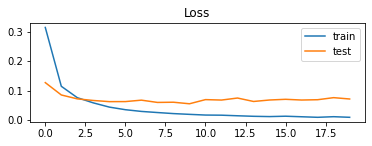

In [14]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

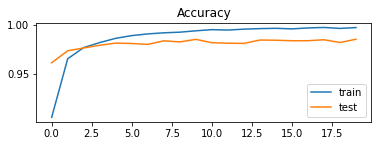

In [15]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

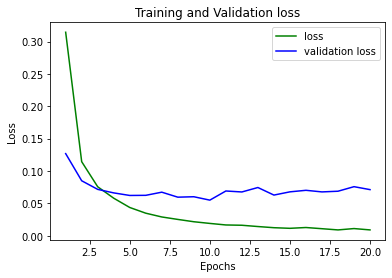

In [16]:
# Loss vs Epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

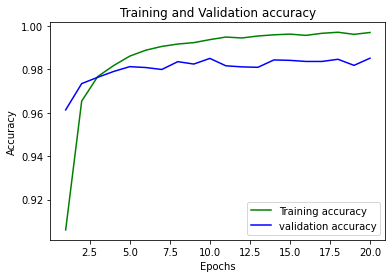

In [17]:
# accuracy vs Epochs
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Building a Neural Network with relu activation in Hidden Layer
nn2 = Sequential()
# Input Layer is being added. The number of neurons in the first layer of the input layer must be more than 784, therefore I used 1024 neurons, 
# and the input shape must be provided in the first layer.
nn2.add(Dense(800,activation="relu",input_shape=(784,)))
nn2.add(Dropout(0.20))
# Hidden Layer
nn2.add(Dense(350,activation="relu"))
nn2.add(Dropout(0.20))
# Adding Output Layer
nn2.add(Dense(10,activation="softmax"))
# Compiling the Model
nn2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800)               628000    
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 350)               280350    
                                                                 
 dropout_3 (Dropout)         (None, 350)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3510      
                                                                 
Total params: 911,860
Trainable params: 911,860
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fit Model
history_2 = nn2.fit(X_train, y_train, epochs=20,batch_size=128, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.2402 - accuracy: 0.9276 - val_loss: 0.1077 - val_accuracy: 0.9640
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0974 - accuracy: 0.9699 - val_loss: 0.0801 - val_accuracy: 0.9742
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0673 - accuracy: 0.9786 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0532 - accuracy: 0.9829 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0649 - val_accuracy: 0.9800
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0739 - val_accuracy: 0.9781
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0327 - accuracy: 0.9887 - val_loss: 0.0713 - val_accuracy:

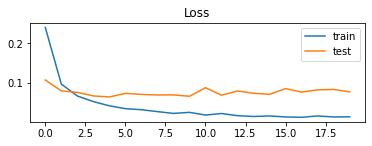

In [20]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.legend()

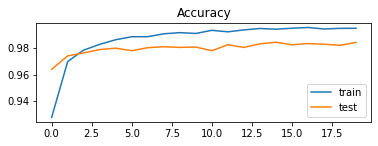

In [21]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

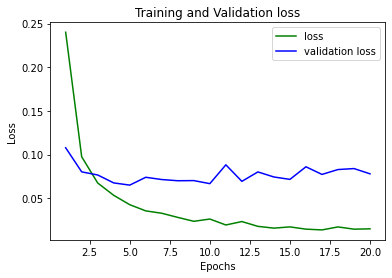

In [22]:
# Loss vs Epochs
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

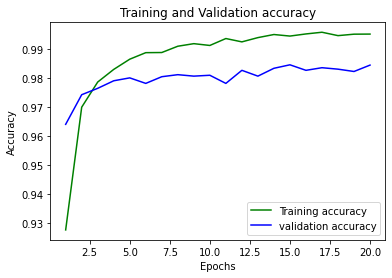

In [23]:
 # accuracy vs Epochs
loss_train = history_2.history['accuracy']
loss_val = history_2.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()